# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?q="
units = "&units=metric" #Set units parameter to metric
api = "&appid=" + weather_api_key #String structured as per API documentation

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city + units + api
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date     
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | margaret river
Processing Record 2 of Set 1 | tianchang
Processing Record 3 of Set 1 | anadyr
Processing Record 4 of Set 1 | eyl
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | vorgashor
Processing Record 8 of Set 1 | taishan
Processing Record 9 of Set 1 | port saint john's
Processing Record 10 of Set 1 | ta`u
Processing Record 11 of Set 1 | shakawe
Processing Record 12 of Set 1 | robore
Processing Record 13 of Set 1 | borogontsy
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | longyearbyen
Processing Record 16 of Set 1 | nizhneudinsk
Processing Record 17 of Set 1 | zahle
Processing Record 18 of Set 1 | ghadamis
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | qaqortoq
Processing Record 21 of Set 1 | abu qurqas
Processing Record 22 of Set 1 | namibe
Processing Record 23 of Set 1 | 

Processing Record 41 of Set 4 | mejit
Processing Record 42 of Set 4 | isafjordur
Processing Record 43 of Set 4 | fort bragg
Processing Record 44 of Set 4 | santiago de cao
Processing Record 45 of Set 4 | taroudant
Processing Record 46 of Set 4 | nemuro
Processing Record 47 of Set 4 | jamestown
Processing Record 48 of Set 4 | ust-nera
Processing Record 49 of Set 4 | kyain seikgyi township
City not found. Skipping...
Processing Record 0 of Set 5 | pervomayskoye
Processing Record 1 of Set 5 | kayenta
Processing Record 2 of Set 5 | safi
Processing Record 3 of Set 5 | batam
City not found. Skipping...
Processing Record 4 of Set 5 | mawu
Processing Record 5 of Set 5 | port lincoln
Processing Record 6 of Set 5 | az zawr
Processing Record 7 of Set 5 | san antonio de pale
Processing Record 8 of Set 5 | gadzhiyevo
Processing Record 9 of Set 5 | kingston
Processing Record 10 of Set 5 | dali
Processing Record 11 of Set 5 | marquette
Processing Record 12 of Set 5 | mount isa
Processing Record 13 of

Processing Record 26 of Set 8 | huarmey
Processing Record 27 of Set 8 | oruro
Processing Record 28 of Set 8 | melekeok village
Processing Record 29 of Set 8 | piti village
Processing Record 30 of Set 8 | kailua-kona
Processing Record 31 of Set 8 | surab
Processing Record 32 of Set 8 | celestun
Processing Record 33 of Set 8 | narvik
Processing Record 34 of Set 8 | cargados carajos
City not found. Skipping...
Processing Record 35 of Set 8 | comodoro rivadavia
Processing Record 36 of Set 8 | masuguru
Processing Record 37 of Set 8 | tolanaro
Processing Record 38 of Set 8 | bubaque
Processing Record 39 of Set 8 | roswell
Processing Record 40 of Set 8 | chiroqchi
Processing Record 41 of Set 8 | mweka
Processing Record 42 of Set 8 | udachny
Processing Record 43 of Set 8 | shingu
Processing Record 44 of Set 8 | callao
Processing Record 45 of Set 8 | sao joao da barra
Processing Record 46 of Set 8 | matoury
Processing Record 47 of Set 8 | rubtsovsk
Processing Record 48 of Set 8 | uyar
Processin

Processing Record 18 of Set 12 | porto novo
Processing Record 19 of Set 12 | quatro barras
Processing Record 20 of Set 12 | elmendorf air force base
City not found. Skipping...
Processing Record 21 of Set 12 | midland
Processing Record 22 of Set 12 | autazes
Processing Record 23 of Set 12 | eral
Processing Record 24 of Set 12 | alofi
Processing Record 25 of Set 12 | kowon-up
Processing Record 26 of Set 12 | cable beach
City not found. Skipping...
Processing Record 27 of Set 12 | betong
Processing Record 28 of Set 12 | arish
Processing Record 29 of Set 12 | lahij
Processing Record 30 of Set 12 | majene
Processing Record 31 of Set 12 | ostersund
Processing Record 32 of Set 12 | plastun
Processing Record 33 of Set 12 | adrar
Processing Record 34 of Set 12 | cedeira
Processing Record 35 of Set 12 | touros
Processing Record 36 of Set 12 | kouango
Processing Record 37 of Set 12 | timimoun
Processing Record 38 of Set 12 | callaway
Processing Record 39 of Set 12 | paungde
Processing Record 40 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,margaret river,-33.9500,115.0667,17.55,66,1,7.72,AU,1704798090
1,tianchang,37.9981,114.0156,-0.99,69,8,0.61,CN,1704798090
2,anadyr,64.7500,177.4833,-20.56,83,100,3.00,RU,1704798093
3,eyl,7.9803,49.8164,28.44,50,15,11.64,SO,1704798093
4,port-aux-francais,-49.3500,70.2167,4.54,74,100,10.29,TF,1704798027


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,17.55,66,1,7.72,AU,1704798090
1,tianchang,37.9981,114.0156,-0.99,69,8,0.61,CN,1704798090
2,anadyr,64.7500,177.4833,-20.56,83,100,3.00,RU,1704798093
3,eyl,7.9803,49.8164,28.44,50,15,11.64,SO,1704798093
4,port-aux-francais,-49.3500,70.2167,4.54,74,100,10.29,TF,1704798027


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

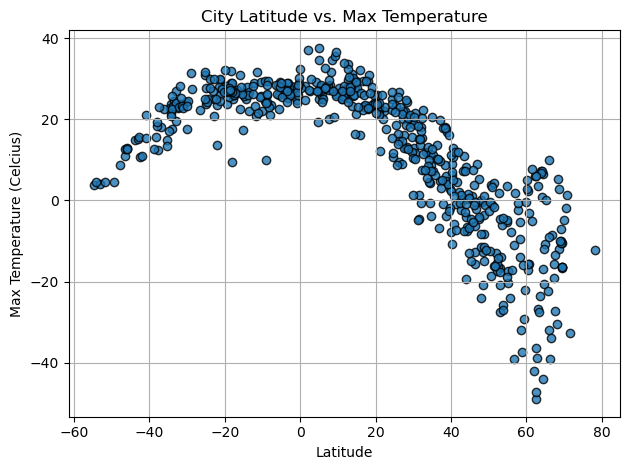

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", marker="o", alpha=0.8)
#Setting edgecolours to black and adding transparency (alpha) to enhance visibility of each data point

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Celcius)")
plt.grid(True) #Add grid to plot for readability
plt.tight_layout() #Auto adjust size

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

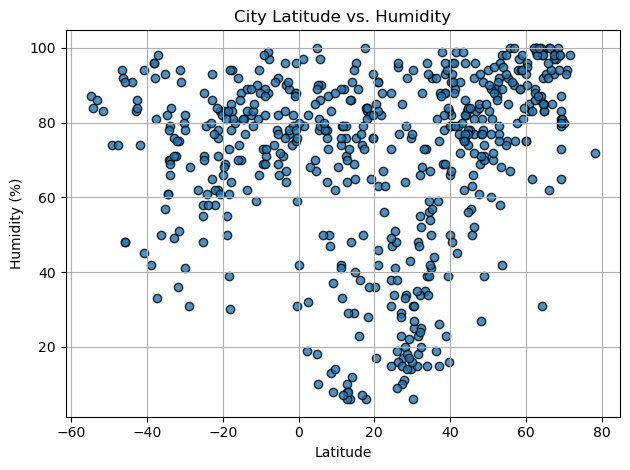

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", marker="o", alpha=0.8)
#Setting edgecolours to black and adding transparency (alpha) to enhance visibility of each data point

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True) #Add grid to plot for readability
plt.tight_layout() #Auto adjust size

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

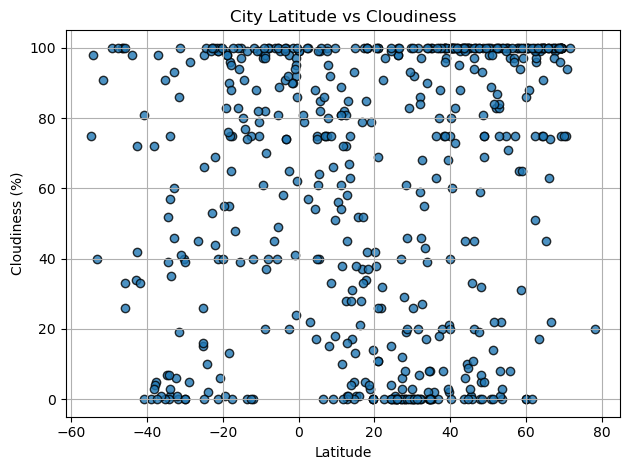

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", marker="o", alpha=0.8)
#Setting edgecolours to black and adding transparency (alpha) to enhance visibility of each data point

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True) #Add grid to plot for readability
plt.tight_layout() #Auto adjust size

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

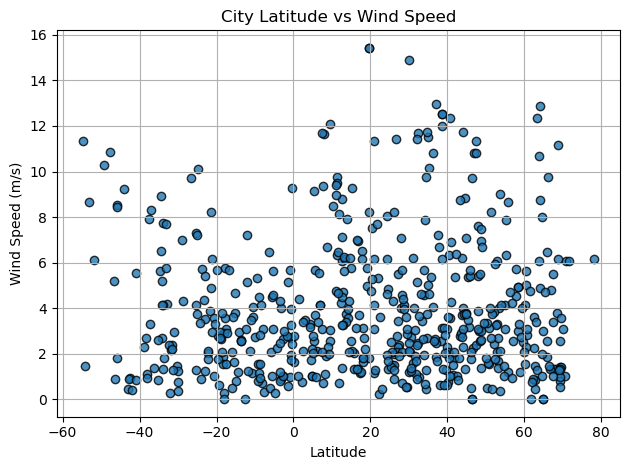

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", marker="o", alpha=0.8)
#Setting edgecolours to black and adding transparency (alpha) to enhance visibility of each data point

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True) #Add grid to plot for readability
plt.tight_layout() #Auto adjust size

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots

#Function will take a series of values from the DataFrame (x_values and y_values)
#ytitle will be a string to name the y axis on the plot and a pair of coordinates of where the equation will be shown on the plot (text_coordinates)
def plot_linear_regression(x_values,y_values,ytitle,text_coordinates):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values) #Call linregress function from scipy.stats
    regress_values = x_values * slope + intercept #Calculate linear regression line
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2)) #Create string version of linear regression equation
    
    #Plot
    plt.scatter(x_values,y_values) #Create base scatter plot
    plt.plot(x_values, regress_values, "r-") #Add the calculated regression line to scatter plot (in red colour)
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red") #Add the regression equation to scatter plot (in red colour & specified func input co-ordinates)
    plt.xlabel("Latitude") #Add x title (always latitude)
    plt.ylabel(ytitle) #Add y title from func input string
    print(f"The r-value is: {rvalue}") #Print the correlation coefficient r
    plt.show() #Show plot

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,tianchang,37.9981,114.0156,-0.99,69,8,0.61,CN,1704798090
2,anadyr,64.7500,177.4833,-20.56,83,100,3.00,RU,1704798093
3,eyl,7.9803,49.8164,28.44,50,15,11.64,SO,1704798093
5,bethel,41.3712,-73.4140,-0.97,89,73,1.08,US,1704798094
6,vorgashor,67.5833,63.9500,-27.26,99,99,1.31,RU,1704798094


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,17.55,66,1,7.72,AU,1704798090
4,port-aux-francais,-49.3500,70.2167,4.54,74,100,10.29,TF,1704798027
8,port saint john's,-31.6229,29.5448,23.83,75,86,2.38,ZA,1704798095
9,ta`u,-14.2336,-169.5144,28.08,77,77,2.97,AS,1704798095
10,shakawe,-18.3667,21.8500,31.82,39,90,1.83,BW,1704798096


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8568727700113037


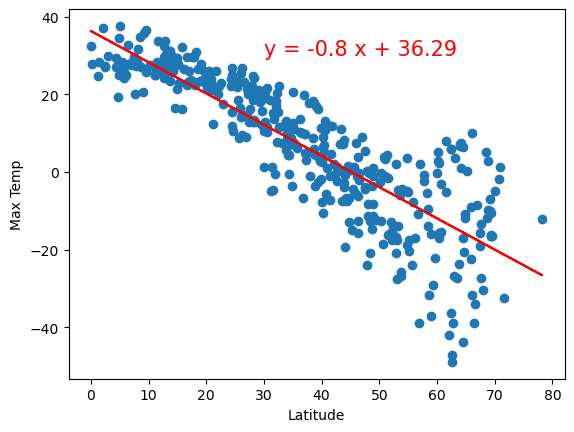

In [32]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"] #Obtain x_values and y_values series from the DataFrame
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (30,30)) #Call function

The r-value is: 0.6862692923787679


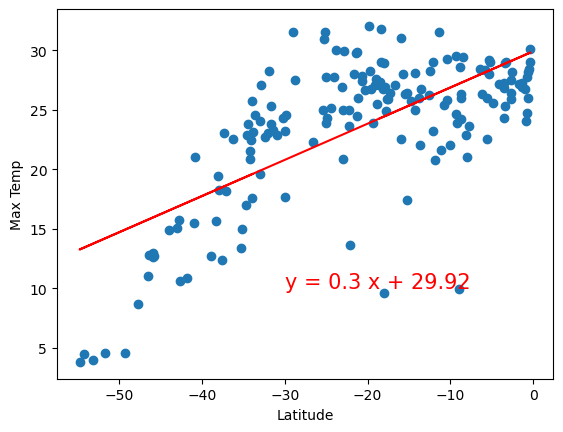

In [33]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"] #Obtain x_values and y_values series from the DataFrame
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (-30,10)) #Call function

**Temperature vs. Latitude linear relationship Discussion**

Northern Hemisphere:
The plot for the Northern Hemisphere displays a clear inverse relationship between latitude and maximum temperature with a slope of -0.8. This is to say, as you move away from the equator to higher latitudes, max temperature will decrease. The R-value is approx. -0.857, which indicates a strong negative correlation between the two variables.

Southern Hemisphere:
The plot of the Southern Hemisphere shows a positive relationship between latitude and maximum temperature with a slope of 0.3. This is still indicative that moving away from the equator to a more negative latitude will result in max temperature decreasing (this being the case as the equator exists at latitude 0). The R-value is approx. 0.686, indicating a moderately strong positive correlation. The lower R-value and slope could be due to the reduced sample size in the southern hemisphere as most of the land mass and human population exist in the northern hemisphere. There are also cities with more extreme latitude values in the northern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.40924424378105584


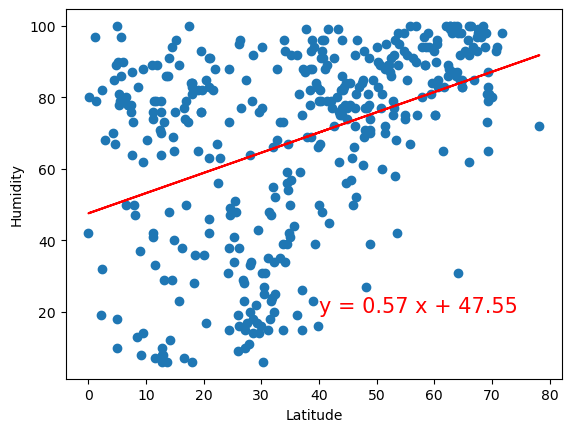

In [34]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"] #Obtain x_values and y_values series from the DataFrame
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (40,20)) #Call function

The r-value is: 0.11444527843648833


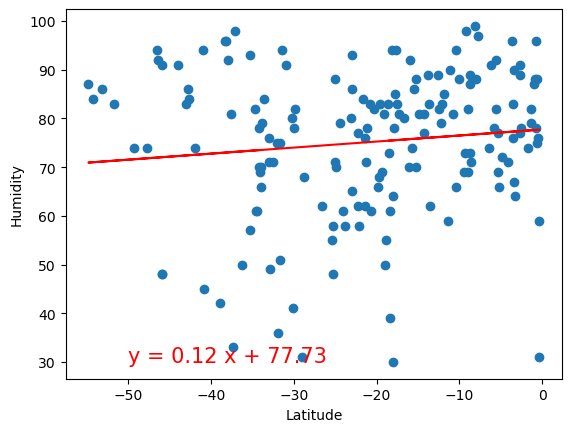

In [35]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"] #Obtain x_values and y_values series from the DataFrame
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (-50,30)) #Call function

**Humidity vs. Latitude linear relationship discussion**

Northern Hemisphere:
The plot demonstrates a positive slope of 0.57 suggesting humidity increases with higher latitudes (moving away from the equator results in higher humidity as a trend). The r-value is 0.409 which indicates a moderate correlation between the two variables.

Southern Hemisphere:
Interestingly, the southern hemisphere plot also has a positive slope (0.12), suggesting that humidity would decrease as a trend when moving away from the equator. The r-value is 0.114 which suggests a very weak correlation. Due to the low r-value, this is an unreliable trend and with the limitations discussed in the Temperature vs. Latitude linear relationship discussion, we cannot confidently conclude that this trend is impactful.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.28035162219807636


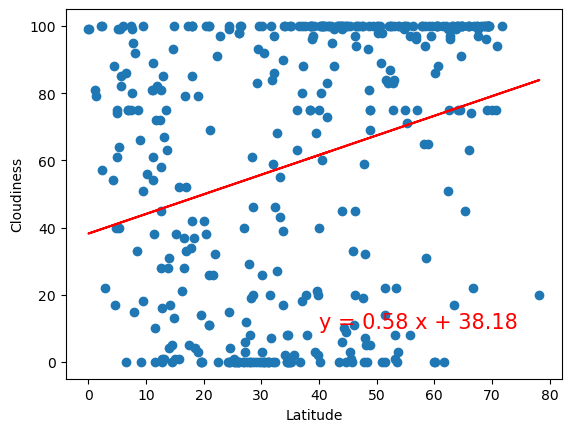

In [36]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"] #Obtain x_values and y_values series from the DataFrame
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (40,10)) #Call function

The r-value is: 0.29540309584168944


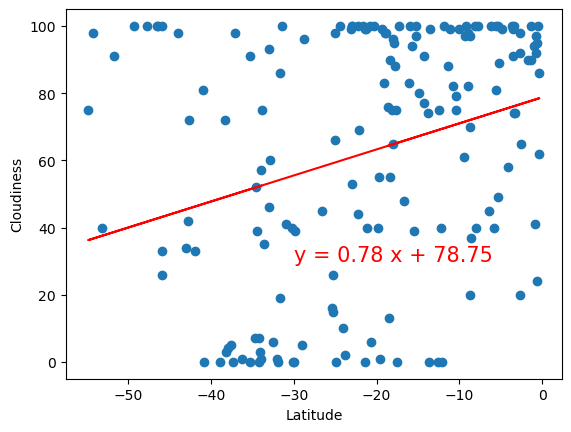

In [37]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"] #Obtain x_values and y_values series from the DataFrame
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (-30,30)) #Call function

**Cloudiness vs. Latitude linear relationship Discussion**

Northern Hemisphere:
The plot shows a positive relationship between cloudiness and latitude with a slope of 0.58 and an r-value of 0.280 which indicates a weak to moderate correlation. This suggests that as you move away from the equator, cloudiness would tend to increase. As can be seen in the plot, the data is visually sporadic but there does appear to be more cloudiness = 100 data points when latitude > 40 and far more cloudiness = 0 data points when latitude < 40.

Southern Hemisphere:
The southern hemisphere plot has a slope of 0.78 and an r-value of 0.295, this being similar to the northern hemisphere result and demonstrating a positive relationship between cloudiness and latitude with a weak to moderate correlation. The fact that this data was pulled during summer in the southern hemisphere supports these trends. This is as the higher temperatures in the southern hemisphere results in the least amount of cloudiness there, with cloudiness then increasing as a trend towards the equator then further into the northern hemisphere as sun exposure is lower during this time of year.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.077201924486759


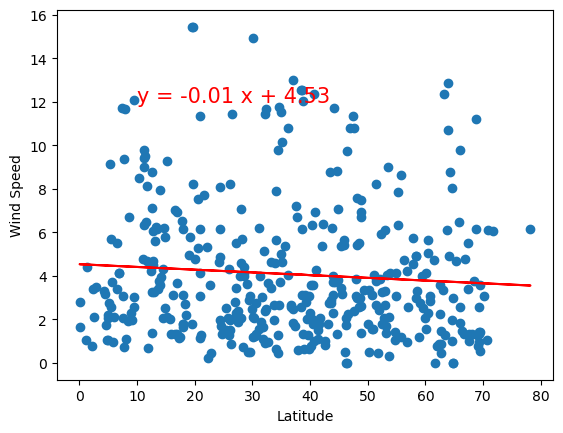

In [38]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"] #Obtain x_values and y_values series from the DataFrame
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (10,12)) #Call function

The r-value is: -0.28891425983647


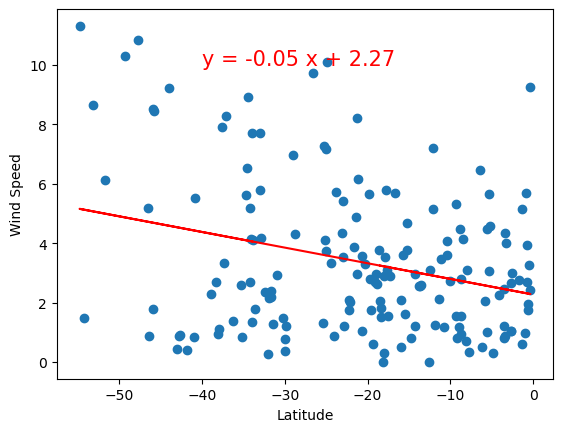

In [39]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"] #Obtain x_values and y_values series from the DataFrame
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-40,10)) #Call function

**Wind Speed vs. Latitude linear relationship Discussion**

Both hemispheres demonstrate weak correlations between latitude and wind speed, with r-values of (-0.077 & -0.289). The northern hemisphere plot suggests that wind speed would decrease slightly as you move away from the equator (slope of -0.01). The southern hemisphere indicates that wind speed would increase as you move away from the equator (slope of -0.05).

As discussed before, this may be due to it being summer in the southern hemisphere at the time of data being pulled. Regardless, these are fairly weak trends and other factors are likely much more impactful on wind speed at any location.